<a href="https://colab.research.google.com/github/muffins-all-day/ML_algo_practice/blob/main/ML_algo_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [ ]:
#Loading the dataset
df = pd.read_csv('/content/diabetes_clean.csv', header = None)

In [ ]:
#Understanding the dataset and changing the features from row0
df.head()
df.columns = df.iloc[0]
df = df[1:]
index_list = []
for index in range(0, len(df)):
  index_list.append(index)
df.index = index_list
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Extracting features and target variable
X = df[["pregnancies", "glucose", "insulin", "bmi"]].values
y = df["diabetes"].values
print(X.shape, y.shape)

(768, 4) (768,)


In [ ]:
#Fitting the classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

In [ ]:
#Predicting on an instance of unlabeled data
X_new = [[1, 85, 0, 30]]
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))


Predictions: ['0']


In [ ]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Predicting accuracy
print(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
print(y_pred)

In [ ]:
#Predicting accuracies for different k-values
train_accuracies = {}
test_accuracies = {}
neighbours_values = np.arange(1, 26)

#Neighbour iterator
for k in neighbours_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_accuracies[k] = knn.score(X_train, y_train)
  test_accuracies[k] = knn.score(X_test, y_test)




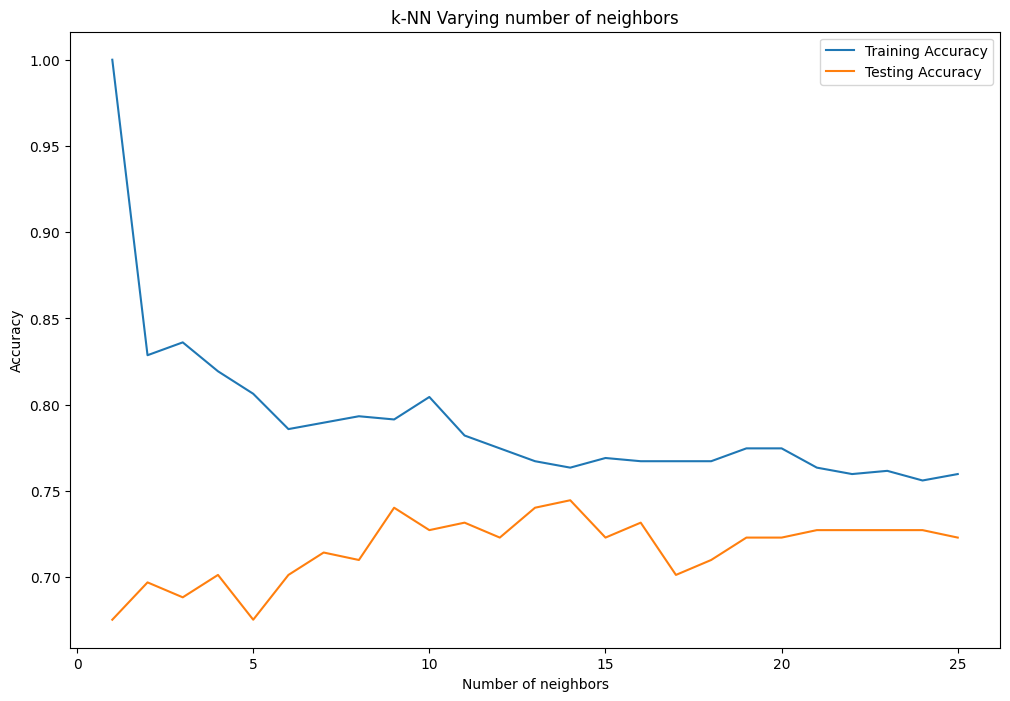

In [ ]:
#Affect of neighbours values on accuracies with data visualisation
plt.figure(figsize=(12, 8))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours_values, train_accuracies.values(), label='Training Accuracy')
plt.plot(neighbours_values, test_accuracies.values(), label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

# **Regression Model**
Simple regression model to make prediction from a diabetes dataset using single/multiple features

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold


In [ ]:
diabetes_df = pd.read_csv('/content/diabetes_clean.csv', header = None)
diabetes_df.columns = diabetes_df.iloc[0]
diabetes_df = diabetes_df[1:]
index_list = []
for index in range(0, len(diabetes_df)):
  index_list.append(index)
diabetes_df.index = index_list
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pregnancies  768 non-null    object
 1   glucose      768 non-null    object
 2   diastolic    768 non-null    object
 3   triceps      768 non-null    object
 4   insulin      768 non-null    object
 5   bmi          768 non-null    object
 6   dpf          768 non-null    object
 7   age          768 non-null    object
 8   diabetes     768 non-null    object
dtypes: object(9)
memory usage: 60.0+ KB


In [ ]:
#Data conversion to float
diabetes_df[['bmi', 'dpf']] = diabetes_df[['bmi', 'dpf']].astype(float)
diabetes_df[['age', 'pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin']] = diabetes_df[['age', 'pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin']].astype(int)
diabetes_df.head()
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 60.0+ KB


In [ ]:
#Feature and target arrays
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
print(X.shape, y.shape)
print(type(X), type(y))

(768, 8) (768,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
#Making predictions from a single feature
#Making the feature two dimensional to ensure its compatibility with Scikit
X_age = X[:, 6].reshape(-1, 1)
print(X_age.shape)
print(type(X_age))

(768, 1)
<class 'numpy.ndarray'>


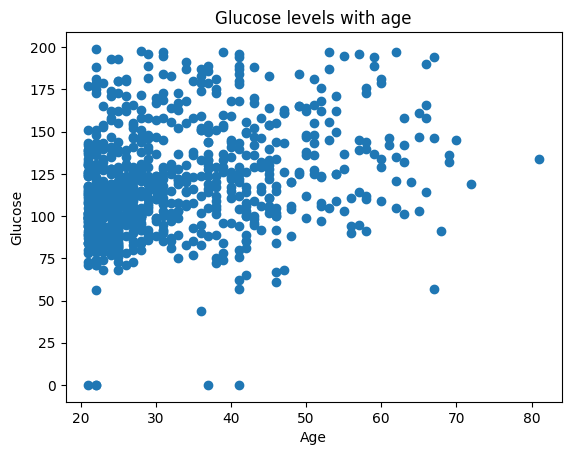

In [ ]:
plt.scatter(X_age, y)
plt.title("Glucose levels with age")
plt.ylabel('Glucose')
plt.xlabel('Age')
plt.show()

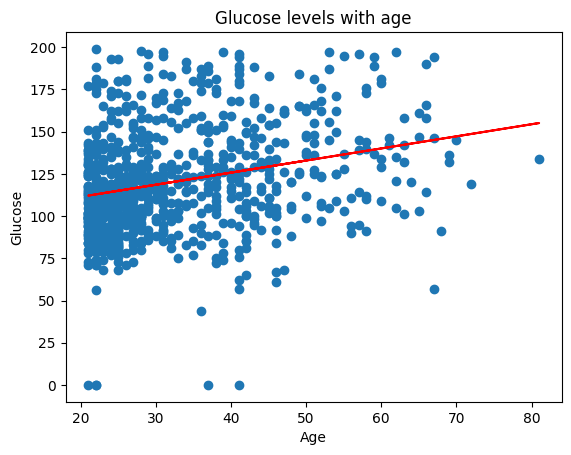

In [ ]:
#Linear Regression - fitting a straight line to our data
reg = LinearRegression().fit(X_age, y)
predictions = reg.predict(X_age)
plt.scatter(X_age, y)
plt.plot(X_age, predictions, color='red')
plt.title("GLucose levels with age")
plt.ylabel('Glucose')
plt.xlabel('Age')
plt.show()


In [ ]:
#Linear regression using all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
predictions = reg.predict(X_test)

#Performance metrics
#Printing the R-squared - how much variance can be explained by the features
print("R-squared value -", reg.score(X_test, y_test))
#The model has an avg error of 26.34mg/dl for glucose levels.
print("RMSE -", mean_squared_error(y_test, predictions, squared=False))


R-squared value - 0.28280468810375115
RMSE - 26.341459582232265


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Cross - Validation**
--> Model performance depend upon the way we split up data

In [ ]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

#results in R-squares array, the default score in linear regression
print(cv_results)
print("Average 6-fold CV R^2 value: {}".format(np.mean(cv_results)))  #The higher the better
print(np.std(cv_results))
print("95% confidence interval: ", np.quantile(cv_results, [0.025, 0.975]))

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]
Average 6-fold CV R^2 value: 0.31909697867344794
0.070153206101142
95% confidence interval:  [0.24088592 0.41580685]


**Ridge Regression - Tikhonov Regression - L2 Regularization**
-used in Linear Regression to address issues of overfitting and multicollinearity by penalizing the weights/coefficients

In [ ]:
scores = []
for alpha in [0, 0.1, 1, 10, 100, 1000]:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_test)
  scores.append(ridge.score(X_test, y_test))

#R-squared values for different values of alpha
print(scores)

[0.28280468810375103, 0.2828466623222221, 0.28320633574804766, 0.2853000732200006, 0.26423984812668133, 0.19292424694100963]


**Lasso Regression - L1 Regularization** - to identify important features

In [ ]:
scores = []
for alpha in [0.1, 1, 10, 100, 1000]:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  lasso_pred = lasso.predict(X_test)
  scores.append(lasso.score(X_test, y_test))

#R-squared values for different values of alpha
print(scores)


[0.28575325694826237, 0.29795609755827845, 0.17989838789273893, 0.10438614467572016, 0.04044144424693341]


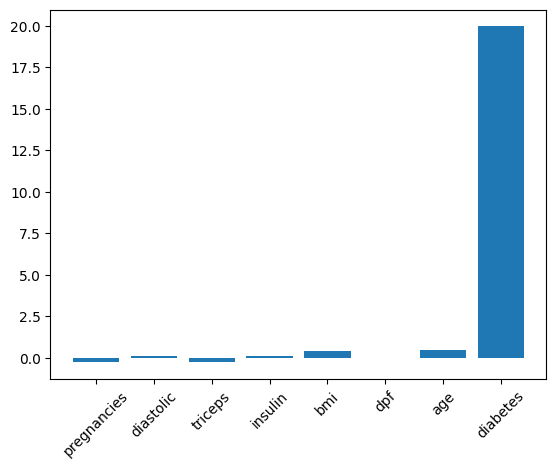

In [ ]:
#using Lasso on the diabetes dataset

feature_names = diabetes_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha=1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(feature_names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

**Learning about Classification Metrics**

In [ ]:
X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df["diabetes"].values
knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#Confusion matrix in scikit-learn
print(confusion_matrix(y_test, y_pred))


#Classification report
print(classification_report(y_test, y_pred))

[[165  36]
 [ 47  60]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308



# Logistic Regression - predicts the probability of a binary outcome

In [30]:
from sklearn.linear_model import LogisticRegression

In [35]:
telecom_df = pd.read_csv('/content/telecom_churn_clean.csv', header = None)
telecom_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
1,0.0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
2,1.0,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0
3,2.0,137,415,0,0,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,0
4,3.0,84,408,1,0,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0


In [43]:
X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df["diabetes"].values
logreg = LogisticRegression(max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
print(y_pred_proba[0])
#The probability of having diabetes of the first instance

0.22826831518423235
